In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import re
#import random
#from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.preprocessing import QuantileTransformer
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
#from string import ascii_letters
import seaborn as sns
import h5py as h5


In [27]:
df =pd.read_pickle('../pickle_pd/second_pd_top_25.pkl')
features = list(df)[:-1]
labels = df['label'].unique()

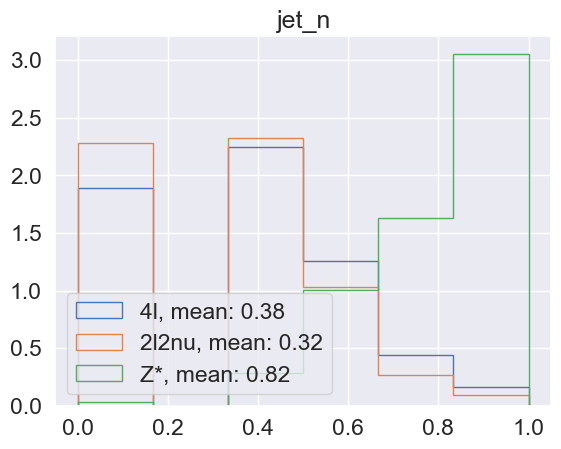

In [28]:
sns.set(font_scale = 1.5)
feature = 'jet_n'  # Specify the feature you want to analyze
num_bins = 6  # Number of bins (1 to 7)

min_value = df[feature].min()
max_value = df[feature].max()
bin_edges = np.linspace(0, 1, num_bins + 1) # Bin edges for integers 1 to 7
mean_list = []
plt.figure()
for label in labels:
    data = df[df['label'] == label][feature]
    mean_list.append(np.mean(data))
    plt.hist(data, density=True, bins=bin_edges, label=label, histtype='step')
    plt.title(feature)
    L = plt.legend()
L.get_texts()[0].set_text('4l, mean: '+ str(round(mean_list[0],2)))
L.get_texts()[1].set_text('2l2nu, mean: '+ str(round(mean_list[1],2)))
L.get_texts()[2].set_text('Z*, mean: '+ str(round(mean_list[2],2)))
plt.savefig("../Plots/Feature_distributions/2/" + feature + ".png")

In [24]:
qt = QuantileTransformer(random_state=0)
df[features] = qt.fit_transform(df[features])
labels = df['label'].unique()

In [3]:
df.head()

,lep_pt_2,met_et,lep_pt_1,jet_n,lep_E_1,lep_eta_0,jet_pt_0,jet_pt_1,lep_phi_1,lep_eta_1,...,jet_m,jet_eta_1,lep_E_0,lep_pt_3,jet_E_0,jet_pt_2,lep_charge_1,lep_charge_0,jet_E_1,label
0,0.827001,0.380512,0.876871,0.000000,0.679856,0.299734,0.000000,0.0,0.076109,0.306802,...,0.095420,0.502002,0.450911,0.000000,0.000000,0.0,0.000000,1.0,0.0,0
1,0.000000,0.087919,0.823059,0.000000,0.629127,0.640667,0.000000,0.0,0.150230,0.683559,...,0.095420,0.502002,0.297723,0.000000,0.000000,0.0,0.000000,1.0,0.0,0
2,0.889522,0.105194,0.944168,0.413914,0.816004,0.917707,0.332354,0.0,0.813354,0.805162,...,0.139560,0.502002,0.726758,0.957515,0.419390,0.0,0.000000,1.0,0.0,0
3,0.959527,0.135238,0.738807,0.000000,0.898591,0.496582,0.000000,0.0,0.862741,0.939720,...,0.139560,0.502002,0.010326,0.976537,0.000000,0.0,1.000000,0.0,0.0,0
4,0.000000,0.789771,0.000000,0.413914,0.000000,0.497493,0.906905,0.0,0.500501,0.498498,...,0.906466,0.502002,0.466519,0.000000,0.783745,0.0,0.504004,1.0,0.0,0


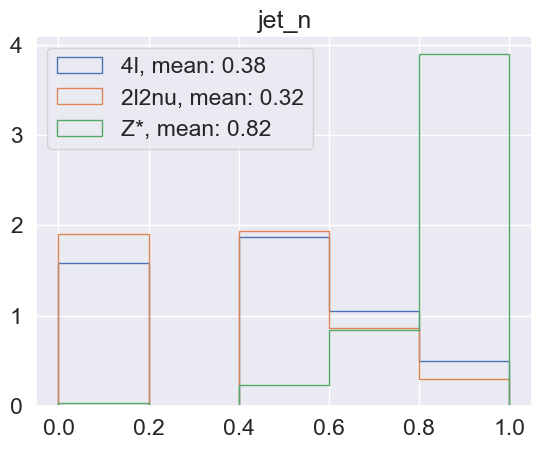

In [31]:
#sns.set(font_scale = 1.5)
feature = 'jet_n'  # Specify the feature you want to analyze
num_bins = 5  # Number of bins (1 to 7)

min_value = df[feature].min()
max_value = df[feature].max()
bin_edges = np.linspace(0, 1, num_bins + 1) # Bin edges for integers 1 to 7
mean_list = []
plt.figure()
for label in labels:
    data = df[df['label'] == label][feature]
    mean_list.append(np.mean(data))
    plt.hist(data, density=True, bins=bin_edges, label=label, histtype='step')
    plt.title(feature)
    L = plt.legend()
L.get_texts()[0].set_text('4l, mean: '+ str(round(mean_list[0],2)))
L.get_texts()[1].set_text('2l2nu, mean: '+ str(round(mean_list[1],2)))
L.get_texts()[2].set_text('Z*, mean: '+ str(round(mean_list[2],2)))
plt.savefig("../Plots/Feature_distributions/2/" + feature + ".png")

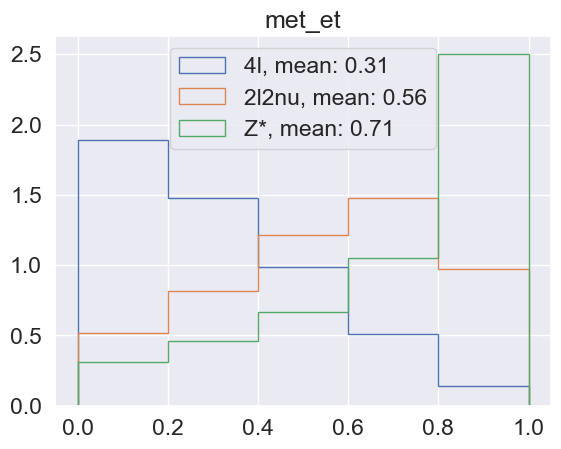

In [32]:
sns.set(font_scale = 1.5)
feature = 'met_et'  # Specify the feature you want to analyze
num_bins = 5  # Number of bins (1 to 7)

min_value = df[feature].min()
max_value = df[feature].max()
bin_edges = np.linspace(0, 1, num_bins + 1) # Bin edges for integers 1 to 7
mean_list = []
plt.figure()
for label in labels:
    data = df[df['label'] == label][feature]
    mean_list.append(np.mean(data))
    plt.hist(data, density=True, bins=bin_edges, label=label, histtype='step')
    plt.title(feature)
    L = plt.legend()
L.get_texts()[0].set_text('4l, mean: '+ str(round(mean_list[0],2)))
L.get_texts()[1].set_text('2l2nu, mean: '+ str(round(mean_list[1],2)))
L.get_texts()[2].set_text('Z*, mean: '+ str(round(mean_list[2],2)))
plt.savefig("../Plots/Feature_distributions/2/" + feature + ".png")

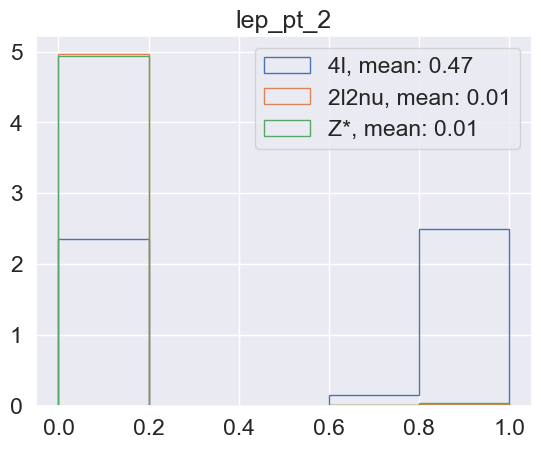

In [33]:
sns.set(font_scale = 1.5)
feature = 'lep_pt_2'  # Specify the feature you want to analyze
num_bins = 5  # Number of bins (1 to 7)

min_value = df[feature].min()
max_value = df[feature].max()
bin_edges = np.linspace(0, 1, num_bins + 1) # Bin edges for integers 1 to 7
mean_list = []
plt.figure()
for label in labels:
    data = df[df['label'] == label][feature]
    mean_list.append(np.mean(data))
    plt.hist(data, density=True, bins=bin_edges, label=label, histtype='step')
    plt.title(feature)
    L = plt.legend()
L.get_texts()[0].set_text('4l, mean: '+ str(round(mean_list[0],2)))
L.get_texts()[1].set_text('2l2nu, mean: '+ str(round(mean_list[1],2)))
L.get_texts()[2].set_text('Z*, mean: '+ str(round(mean_list[2],2)))
plt.savefig("../Plots/Feature_distributions/2/" + feature + ".png")

In [ ]:
sns.set(font_scale = 1.5)
feature = 'lep_pt_2'  # Specify the feature you want to analyze
num_bins = 5  # Number of bins (1 to 7)

min_value = df[feature].min()
max_value = df[feature].max()
bin_edges = np.linspace(0, 1, num_bins + 1) # Bin edges for integers 1 to 7
mean_list = []
plt.figure()
for label in labels:
    data = df[df['label'] == label][feature]
    mean_list.append(np.mean(data))
    plt.hist(data, density=True, bins=bin_edges, label=label, histtype='step')
    plt.title(feature)
    L = plt.legend()
L.get_texts()[0].set_text('4l, mean: '+ str(round(mean_list[0],2)))
L.get_texts()[1].set_text('2l2nu, mean: '+ str(round(mean_list[1],2)))
L.get_texts()[2].set_text('Z*, mean: '+ str(round(mean_list[2],2)))
plt.savefig("../Plots/Feature_distributions/2/" + feature + ".png")